# MSAI Computer Vision course
# Seminar 01: Images operations

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## CV libraries in Python

### [OpenCV](https://opencv.org/)

Language: C++\
Initial release: 2000\
Stars on Github: 57.5k

In [1]:
!pip install opencv-python-headless # without graphical part which is ugly and buggy

In [2]:
import cv2


cv2.__version__

ModuleNotFoundError: No module named 'cv2'

In [4]:
opencv_img = cv2.imread("lena.png")
opencv_img  # in BGR format

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

In [5]:
type(opencv_img), opencv_img.dtype, opencv_img.shape

(numpy.ndarray, dtype('uint8'), (512, 512, 3))

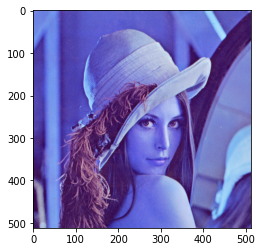

In [6]:
plt.imshow(opencv_img)

**First:** the origin point is in _upper-left_ point instead of bottom-left for ordinary Cartesian coordinate system. This is for historical reasons.

**Second:** Image is blue because OpenCV's default channels order is **BGR**.

Now let's make Lena _honest person_ again with `cv2.cvtColor` ([check documentation for more info](https://docs.opencv.org/4.5.3/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab)):

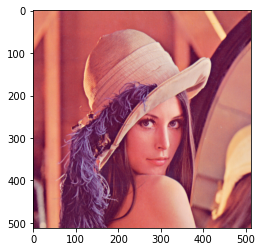

In [7]:
opencv_img_rgb = cv2.cvtColor(opencv_img, cv2.COLOR_BGR2RGB)
plt.imshow(opencv_img_rgb)

We also could achieve the same result with syntactically simplier commands\
because we know that third dimension of numpy array stands for colour channels:

In [8]:
np.allclose(opencv_img[:, :, ::-1], opencv_img_rgb)

True

In [9]:
np.allclose(opencv_img[:, :, [2, 1, 0]], opencv_img_rgb)

True

BGR is consisten across OpenCV, but if you use external library to process image further, you probably need to convert it to RGB.

### [Pillow (aka PIL or Python Image Library)](https://python-pillow.org/)

Laguage: Python, C\
Initial release: 1995 (original PIL), 2010 (Pillow)\
Stars on Github: 9.1k

It has even faster compatible implementation - [Pillow-SIMD](https://github.com/uploadcare/pillow-simd)

In [10]:
# !pip install Pillow-SIMD  # Faster version of Pillow

In [11]:
import PIL


PIL.__version__

'7.0.0.post3'

In [12]:
from PIL import Image

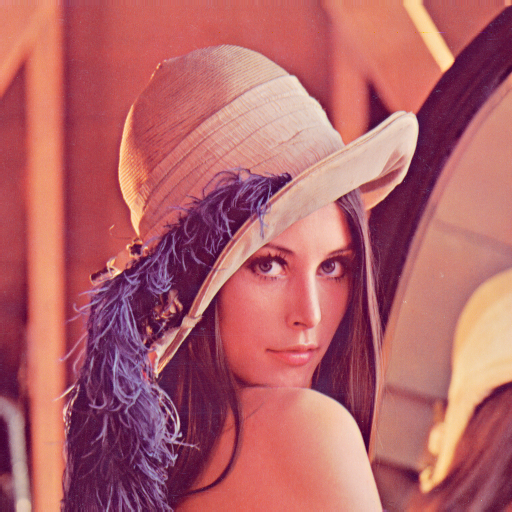

In [13]:
pil_img = Image.open("lena.png")
pil_img

In [14]:
type(pil_img), pil_img.size

(PIL.PngImagePlugin.PngImageFile, (512, 512))

In [15]:
pil_img_numpy = np.array(pil_img)

In [16]:
pil_img_numpy.dtype, pil_img_numpy.shape

(dtype('uint8'), (512, 512, 3))

In [17]:
np.allclose(pil_img_numpy, opencv_img_rgb)

True

### [Skimage](https://scikit-image.org/docs/stable/api/skimage.html)

Language: Python (depends on Pillow)\
Initial release: 2009\
Stars on Github: 4.6k

In [18]:
# !pip install skimage

In [19]:
import skimage


skimage.__version__

'0.19.0'

In [20]:
from skimage.io import imread

In [21]:
skimage_img = imread("lena.png")
skimage_img

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]

In [22]:
type(skimage_img), skimage_img.dtype, skimage_img.shape

(numpy.ndarray, dtype('uint8'), (512, 512, 3))

In [23]:
np.allclose(skimage_img, opencv_img_rgb)

True

### Comparing libraries

Antialiasing:

<img src="https://raw.githubusercontent.com/GaParmar/clean-fid/main/docs/images/resize_circle_extended.png" alt="Drawing" style="width: 600px;"/>

<img src="antialiasing.png" alt="Drawing" style="width: 600px;"/>

More info on FID in [paper](https://arxiv.org/pdf/2104.11222.pdf) and [repository](https://github.com/GaParmar/clean-fid)

## The most famous Computer Vision image

Leena has dedicated [Wikipedia page](https://en.wikipedia.org/wiki/Lenna) and [site](http://www.lenna.org/)

![](lena.png)

## Images in computer memory

Images in Python are usually represented as numpy arrays of types:

1. `uint8` representation with integer values in [0, 255] - used to store images on disk
1. `float32` representation with float values in  [0, 1]

and the dimensions depends on three factors:

1. height
1. width
1. number of channels (3 for color RGB, 1 for grayscale)

In [24]:
lena = cv2.imread("lena.png")
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

lena.dtype, lena.shape, lena.min(), lena.max()

(dtype('uint8'), (512, 512, 3), 3, 255)

In [25]:
lena_float = lena / 255  # Maximum value that could be stored in uint8

lena_float.dtype, lena.shape, lena_float.min(), lena_float.max()

(dtype('float64'), (512, 512, 3), 0.011764705882352941, 1.0)

## Quantization

To save some memory we could use less colour values

Let's see how many colours do we use now:

In [26]:
colours_used = len(np.unique(lena))

print(f"We use {colours_used} colours out of 255")

We use 253 colours out of 255


In [27]:
from sklearn.cluster import KMeans


def reduce_quantization(image: np.ndarray, n_colors: int = 6):
    kmeans = KMeans(n_clusters=n_colors)
    kmeans.fit(image.reshape((-1, 1)))

    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    return centers[labels].reshape(image.shape).astype(np.uint8)

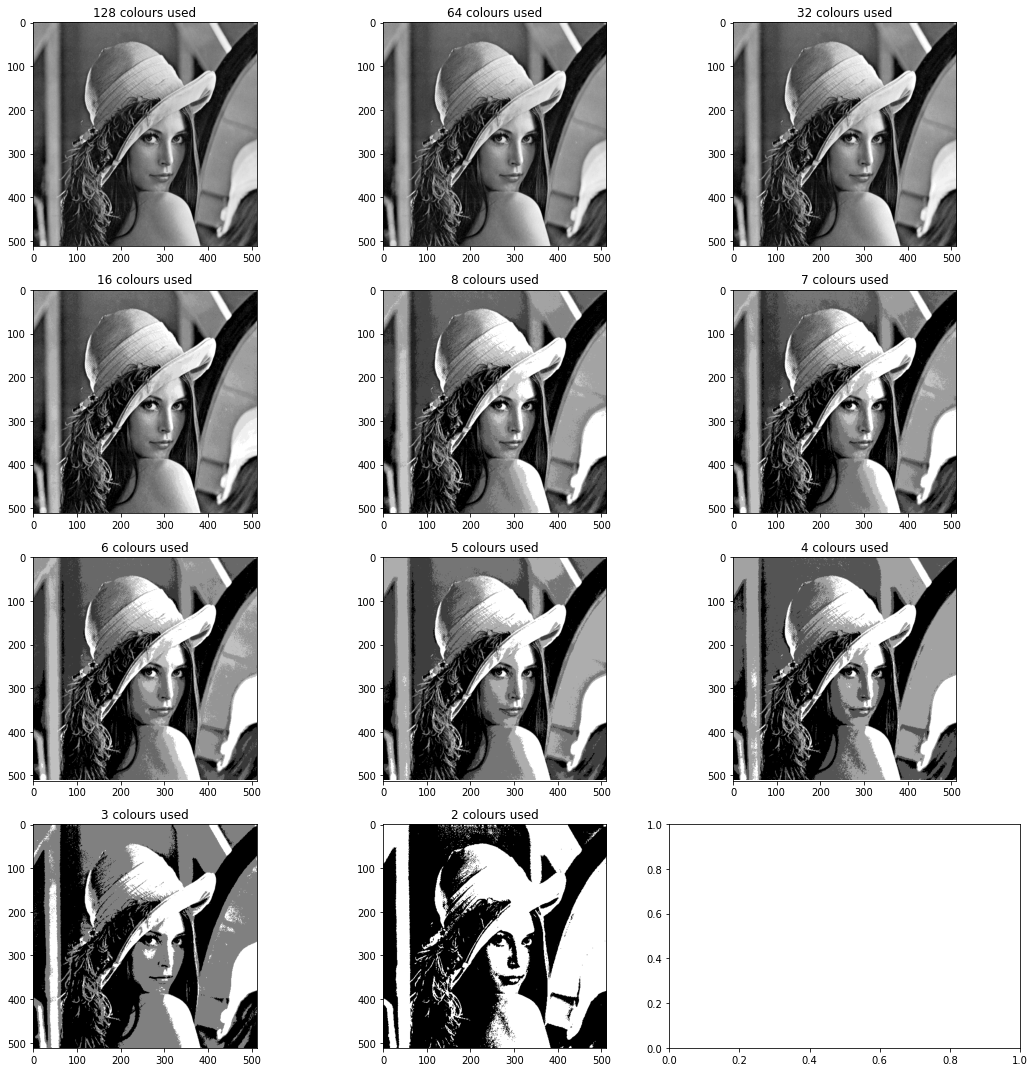

In [28]:
target_colours = (128, 64, 32, 16, 8, 7, 6, 5, 4, 3, 2)
lena_green = lena[..., 1]

fig, axes = plt.subplots(4, 3, figsize=(15, 15), tight_layout=True)

for n_colors, axis in zip(target_colours, axes.flat):
    lena_reduced = reduce_quantization(lena_green, n_colors)

    axis.imshow(lena_reduced, cmap="gray")
    axis.set_title(f"{n_colors} colours used")

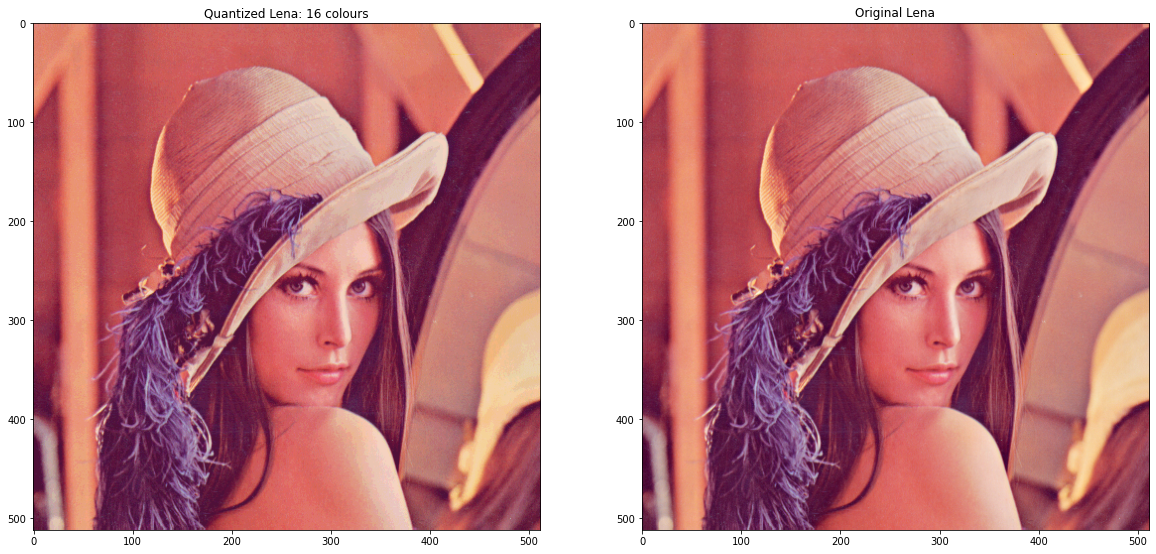

In [29]:
n_colours = 16

lena_reduced_r = reduce_quantization(lena[..., 0], n_colours)
lena_reduced_g = reduce_quantization(lena[..., 1], n_colours)
lena_reduced_b = reduce_quantization(lena[..., 2], n_colours)
lena_quantized = np.stack([lena_reduced_r, lena_reduced_g, lena_reduced_b], -1)

_, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(lena_quantized)
axes[0].set_title(f"Quantized Lena: {n_colours} colours")
axes[1].imshow(lena)
axes[1].set_title("Original Lena")
plt.show()

## Histograms

In [30]:
def histogram(image: np.ndarray):
    counts = np.bincount(image.ravel())
    return np.arange(counts.shape[0]), counts

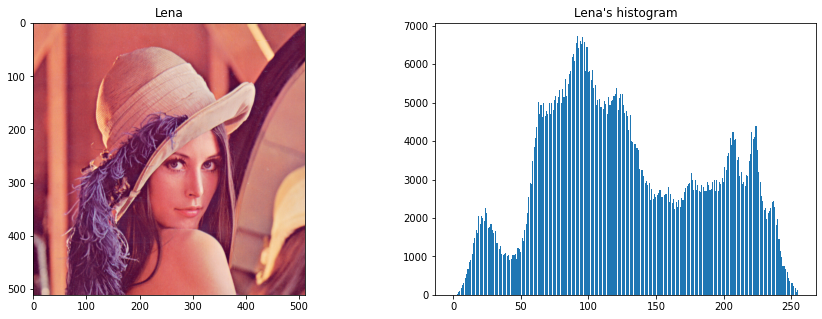

In [32]:
lena_vals, lena_hist = histogram(lena)

_, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].imshow(lena)
axes[0].set_title("Lena")

axes[1].bar(lena_vals, lena_hist)
axes[1].set_title("Lena's histogram");

## Contrast

In [34]:
from skimage.io import imread


contrast = imread("low_contrast.jpg")

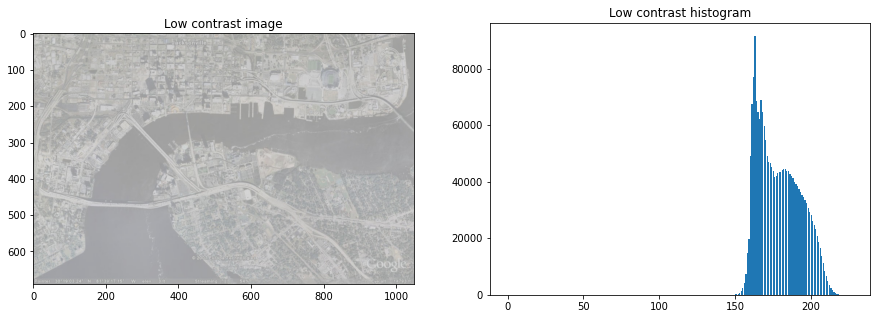

In [36]:
contrast_vals, contrast_hist = histogram(contrast)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(contrast, cmap="gray")
ax[0].set_title("Low contrast image")
ax[1].bar(contrast_vals, contrast_hist)
ax[1].set_title("Low contrast histogram");

### Histogram equalization for adjusting contrast

In [43]:
from skimage import img_as_float, img_as_ubyte
from skimage.exposure import adjust_gamma, adjust_log, equalize_hist

In [38]:
contrast_correction = equalize_hist(contrast)
contrast_correction = img_as_ubyte(contrast_correction, force_copy=False)

/usr/local/Caskroom/miniconda/base/envs/computer-vision/lib/python3.9/site-packages/skimage/_shared/utils.py:338: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


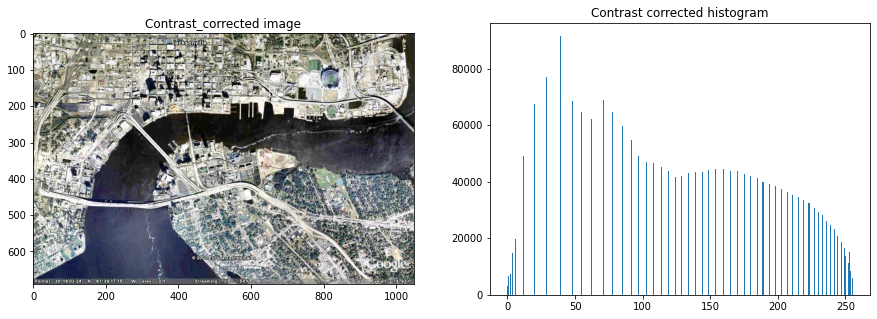

In [40]:
contrast_correction_vals, contrast_correction_hist = histogram(contrast_correction)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(contrast_correction)
ax[0].set_title("Contrast_corrected image")
ax[1].bar(contrast_correction_vals, contrast_correction_hist)
ax[1].set_title("Contrast corrected histogram");

### [Gamma correction](https://en.wikipedia.org/wiki/Gamma_correction)

This transform is related to difference in eye and camera light perception, [see more info here](https://www.cambridgeincolour.com/tutorials/gamma-correction.htm)

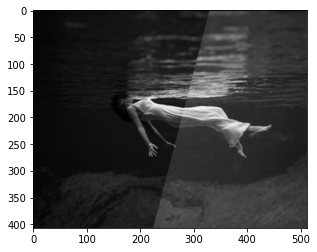

In [45]:
swim = img_as_float(imread("gamma.jpg"))

plt.imshow(swim, cmap="gray")

In [47]:
def gamma_correction(image: np.ndarray, gamma: float = 1.0, gain: float = 1.0):
    """
    gamma > 1: suppress light regions
    gamma < 1: suppress dark regions
    """
    corrected = gain * (image ** gamma)
    return img_as_ubyte(corrected)

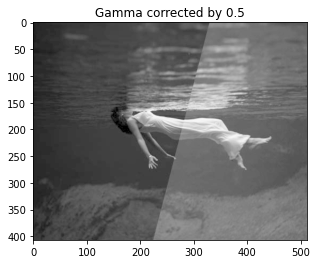

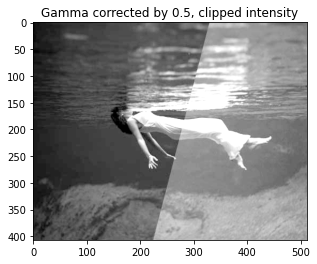

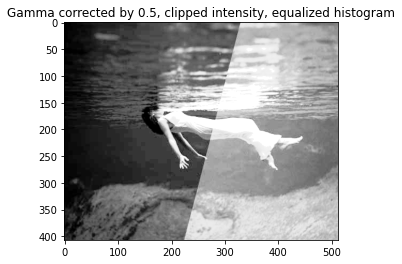

In [49]:
swim_corrected = gamma_correction(swim, gamma=0.5)

plt.imshow(swim_corrected, cmap="gray")
plt.title("Gamma corrected by 0.5")
plt.show()

swim_corrected[swim_corrected < 25] = 25
swim_corrected[swim_corrected > 175] = 175
plt.imshow(swim_corrected, cmap="gray")
plt.title("Gamma corrected by 0.5, clipped intensity")
plt.show()

contrast_correction = equalize_hist(swim_corrected)
contrast_correction = img_as_ubyte(contrast_correction, force_copy=False)
plt.imshow(contrast_correction, cmap="gray")
plt.title("Gamma corrected by 0.5, clipped intensity, equalized histogram")
plt.show()

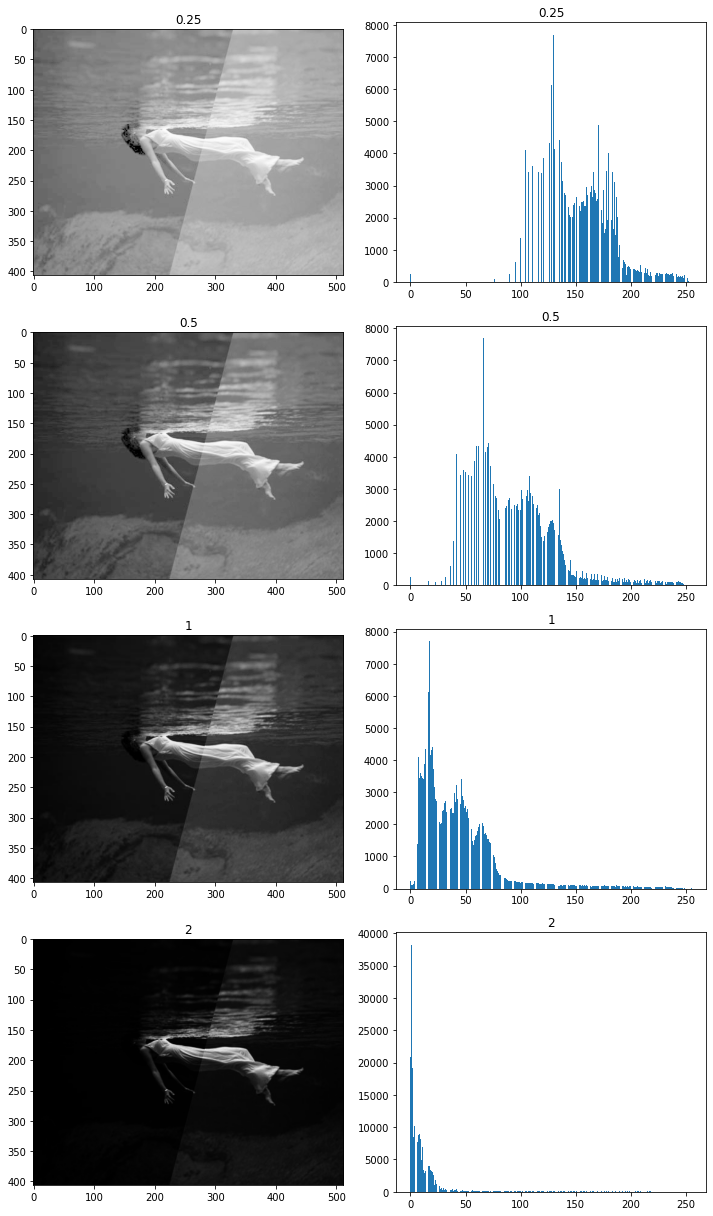

In [53]:
gammas = (0.25, 0.5, 1, 2)

fig, ax = plt.subplots(4, 2, figsize=(10, 17), tight_layout=True)

for i, each in enumerate(gammas):
    swim_corrected = gamma_correction(swim, gamma=each)
    swim_corrected_vals, swim_corrected_hist = histogram(swim_corrected)

    ax[i, 0].imshow(swim_corrected, cmap="gray")
    ax[i, 0].set_title(each)

    ax[i, 1].bar(swim_corrected_vals, swim_corrected_hist)
    ax[i, 1].set_title(each)